In [ ]:
import pickle

# Unpickle the file
with open(r'/content/images.p', "rb") as f:
  images = pickle.load(f)

with open(r'/content/labels.p', "rb") as f:
  labels = pickle.load(f)

In [ ]:
print(images.shape)
print(labels.shape)

(291, 100, 100)
(291,)


In [ ]:
set(labels)

{'Aldrin', 'ritu', 'sitanshu'}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
set(labels)

{0, 1, 2}

In [ ]:
import numpy as np
n_persons = len(set(labels))
print("Number of persons: ", n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i, "-->", label_mapping[i])

Number of persons:  3
0 --> Aldrin
1 --> ritu
2 --> sitanshu


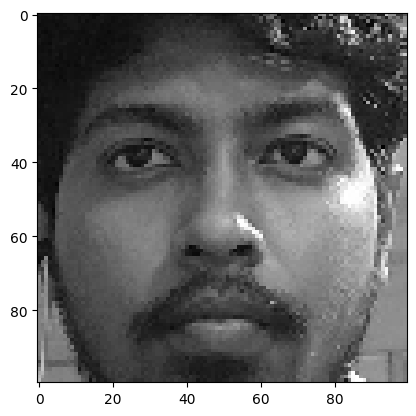

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images[20], cmap=plt.get_cmap("gray"))
plt.show()

In [ ]:
import cv2
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100, 100, 1)
  img = img/255
  return img

In [ ]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input: ", images.shape)

Shape of Input:  (291, 100, 100, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels = to_categorical(labels)

In [ ]:
categories = labels.shape[1]
print(categories)

3


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import convolution layer
from tensorflow.keras.layers import Conv2D
# import pooling layer
from tensorflow.keras.layers import MaxPooling2D
# import faltten layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(64, (5,5), input_shape=(100, 100, 1), activation="relu"))
model.add(Conv2D(64, (5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dense(3, activation="softmax"))
model.compile(Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 21, 32)        0         
 g2D)                                                   

In [ ]:
h=model.fit(images,labels,validation_split=0.2,batch_size=50,epochs=10,verbose=1)

Epoch 1/10
5/5 [==============================] - 42s 8s/step - loss: 0.9854 - accuracy: 0.4655 - val_loss: 2.0501 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 38s 7s/step - loss: 0.6774 - accuracy: 0.8147 - val_loss: 1.2332 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 37s 8s/step - loss: 0.3684 - accuracy: 0.8319 - val_loss: 0.6414 - val_accuracy: 0.8644
Epoch 4/10
5/5 [==============================] - 40s 8s/step - loss: 0.1863 - accuracy: 0.9741 - val_loss: 0.4815 - val_accuracy: 0.8644
Epoch 5/10
5/5 [==============================] - 43s 9s/step - loss: 0.1126 - accuracy: 0.9698 - val_loss: 0.2337 - val_accuracy: 0.8814
Epoch 6/10
5/5 [==============================] - 39s 8s/step - loss: 0.0898 - accuracy: 0.9741 - val_loss: 0.3942 - val_accuracy: 0.8644
Epoch 7/10
5/5 [==============================] - 39s 8s/step - loss: 0.0946 - accuracy: 0.9828 - val_loss: 0.4313 - val_accuracy: 0.8644
Epoch 8/10
5/5 [==========

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
layer0 = Model(model.layers[0].input, model.layers[0].output)
features = layer0.predict(images[69].reshape(1,100,100,1))

1/1 [==============================] - 0s 127ms/step


In [ ]:
features.shape

(1, 96, 96, 64)

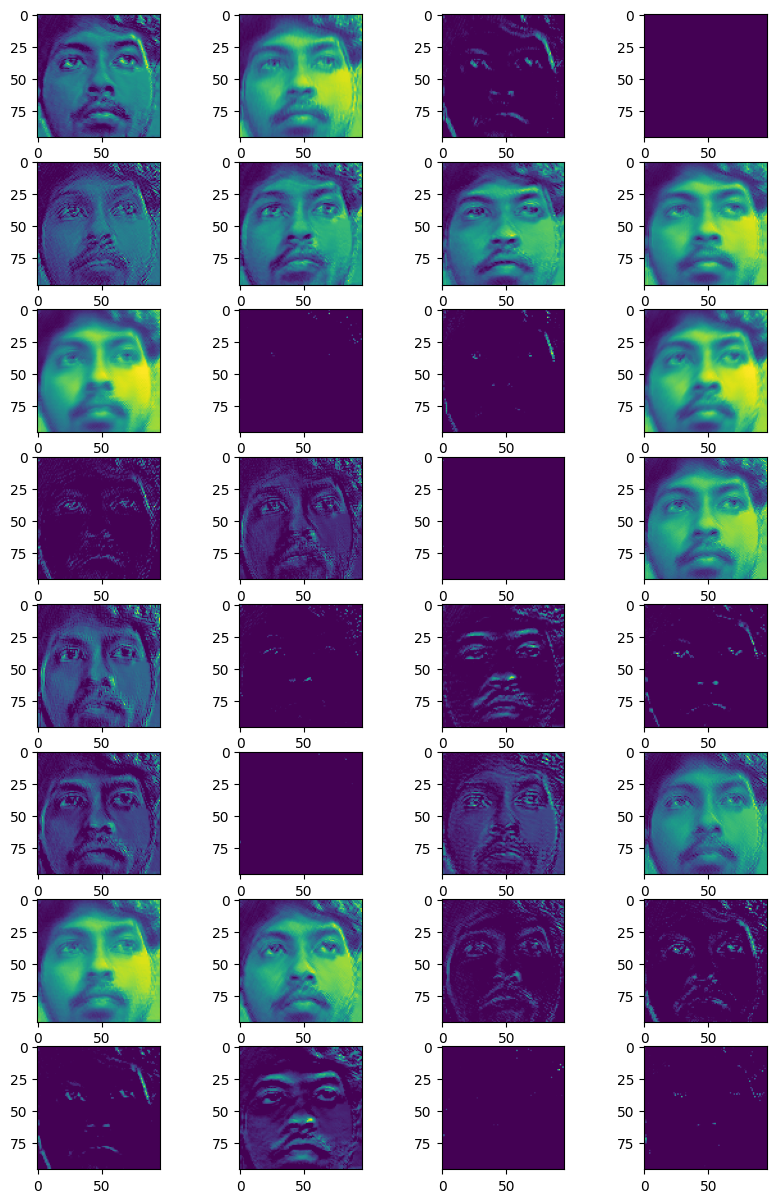

In [ ]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8, 4, i+1)
  plt.imshow(features[0,:,:,i])

In [ ]:
from google.colab import files
upload=files.upload()

Saving Aldrin_0.jpg to Aldrin_0.jpg


In [ ]:
d=list(upload.keys())[0]

[255 216 255 ...  31 255 217]


<ipython-input-23-6cc6288e281e>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


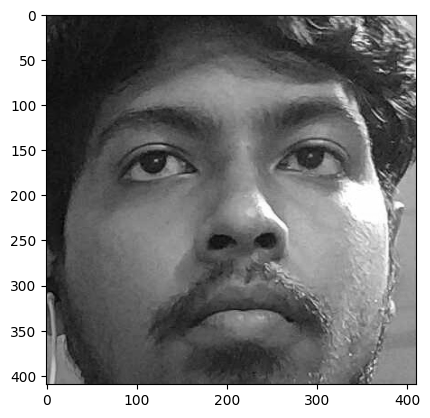

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:

img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)


In [ ]:
img=img.reshape(1,100,100,1)
print(model.predict(img))

1/1 [==============================] - 0s 247ms/step
[[9.965759e-01 7.296467e-05 3.351198e-03]]


In [ ]:
prediction=model.predict(img)

1/1 [==============================] - 0s 72ms/step


In [ ]:
p=np.argmax(prediction,axis=1)
p

array([0])

In [ ]:
model.save('finalmodel.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')